Una forma de construir soluciones aproximadas de la ecuación de Laplace es vía su discretización, esto es, 
representar sus soluciones (funciones que son necesariamente diferenciables) por los valores que toman sobre un conjunto de puntos aislados. Como las soluciones de la ecuación son suaves, podemos esperar que si construimos una función que interpole - digamos, linealmente- los valores entre los diferentes puntos de una grilla suficientemente fina, obtendremos una función que se parece mucho a la solución exacta.


Consideremos primero un ejemplo en una dimensión:
$$
\frac{\partial^2 \phi}{\partial x^2}=0
$$
sujeta a las condiciones $\phi(0)=0$, $\phi(1)=1$. En este caso, la solución es naturalmente $\phi(x)=x$, de manera que para cualquier elección de un conjunto de puntos aislados, conocer la solución sobre ellos nos permite obtener (en forma exacta) la solución en cualquier otro punto vía interpolación lineal (porque la solución exacta *es* lineal).

Si ahora queremos tratar el problema 2D,
$$
\frac{\partial^2 \phi}{\partial x^2}+\frac{\partial^2 \phi}{\partial y^2}=0
$$
las soluciones pueden ser más complicadas, dependiendo de las condiciones de borde. Sin embargo, siguiendo la misma estrategia, podemos estudiar las soluciones del problema discretizando sobre una cuadrícula de puntos espaciados por una distancia mínima $\Delta$, de manera que los puntos de la grilla sean de la forma
$$
(x_i,y_j)=(n_i \Delta, n_j \Delta)
$$
con $n_i$, $n_j$ pares de números enteros.

Podemos discretizar entonces el laplaciano (siguiendo la idea de la interpolación lineal entre puntos) como

$$
(\phi(x_{i+1},y_j)+\phi(x_{i-1} ,y_j)+\phi(x_i,y_{j+1})+\phi(x_i,y_{j-1})-4\phi(x_i,y_j))\times \Delta=0
$$
ó, dividiendo por $4\Delta$,
$$
\phi(x_i,y_j)=\frac{\phi(x_{i+1},y_j)+\phi(x_{i-1} ,y_j)+\phi(x_i,y_{j+1})+\phi(x_i,y_{j-1})}{4}
$$
que podemos interpretar de esta manera: $\phi(x_i,y_j)$ tiene que tomar el *promedio* de los valores de sus vecinos, supuesto que *sobre el borde* el potencial tome valores determinados.

Nótese que la forma de la condición es una igualdad entre el valor del potencial sobre un punto, y una función del valor de los vecinos. Esto permite resolver el problema de manera *autoconsistente*:


* Construimos un arreglo de valores, uno por cada punto en la red.
* Inicializamos los puntos que caen sobre la frontera con los valores de la condición de frontera, y el resto con los valores elegidos de manera de aproximar groseramente el valor de la solución (por ejemplo, el promedio del valor del potencial sobre la frontera).
* Construimos una "mascara" que nos dice qué puntos corresponden a la frontera.
* recorrer cada punto que no pertenezca a la malla, y remplazar su valor por el valor promedio entre sus vecinos.
* repetir el procedimiento hasta que los valores sobre la malla no cambien más.




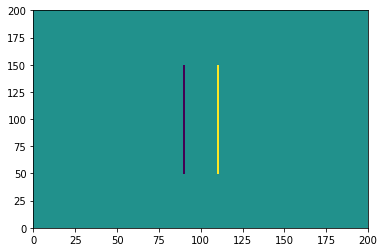

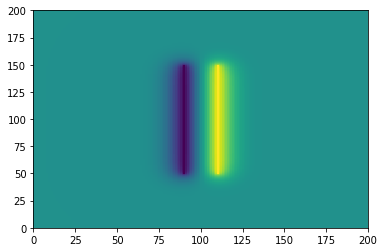

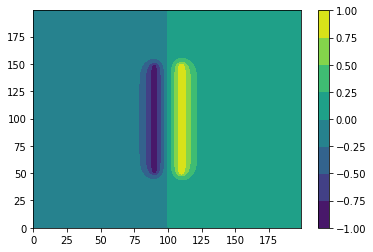

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Discretización de la ecuación de Laplace 2D
# Construiremos una solución aproximada, 

# define el número de puntos sobre la malla
n = 200
# Vamos a definir como frontera dos líneas paralelas, de longitud l, separadas por una distancia sep*l
sep = .1 
# número de iteraciones
npasos = 20

# definimos una "mascara"
mascara = np.zeros((n,n),dtype=int )
# y una matriz para guardar los valores del potencial
phi = np.zeros((n,n))

# rellenamos la máscara con el valor
for i in range(int(n/4),int(3*n/4)):
    mascara[i,int(n*(1.+sep)/2.)] = 1
    mascara[i,int(n*(1.-sep)/2.)] = 1
    phi[i,int(n*(1.+sep)/2.)] = 1.
    phi[i,int(n*(1.-sep)/2.)] = -1.

# Mostramos el estado inicial    
plt.pcolor(phi)
plt.show()

for step in range(n):
    newphi =  np.zeros((n,n))
    # recorro toda la malla, salvo el borde.
    # Nótese que con esta elección, el borde del gráfico es un borde "implícito",
    # que queda a potencial 0.
    for i in range(1,n-1):
        for j in range(1,n-1):
            # si el punto está en la máscara, copio el valor anterior.
            if mascara[i,j] == 1: 
                newphi[i,j] = phi[i,j]
            # si no, lo calculo el promedio
            else:
                newphi[i,j] = .25*(phi[i,j-1]+phi[i,j+1]+phi[i+1,j]+phi[i-1,j])

    phi = newphi

plt.pcolor(newphi)
plt.show()


# Para obtener un gráfico más suave, podemos usar "contourf":
plt.contourf(newphi)
plt.colorbar()
plt.show()


# Un ejemplo más complicado: Una circunferencia frente a un punto:

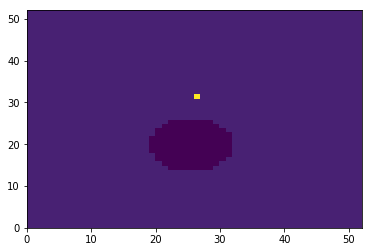

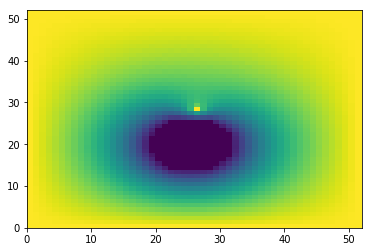

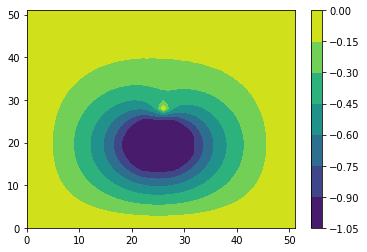

In [44]:

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Discretización de la ecuación de Laplace 2D
# Construiremos una solución aproximada, 

###################   Parámetros #######################
# define el número de puntos sobre la malla
n = 52
# Vamos a pensar en una esfera de radio r, separada de una "punta" separa por una distancia sep*r
sep = .1
# número de iteraciones
npasos = 10*n

########################################################

# definimos una "mascara"
mascara = np.zeros((n,n),dtype=int )
# y una matriz para guardar los valores del potencial
phi = np.zeros((n,n))

# rellenamos la máscara con el valor
# aquí fijamos el valor de la "punta"
mascara[int(n*(1.+sep)/2.),int(n/2)] = 1
phi[int(n*(.5+sep)),int(n/2)] = 10.

# y aquí, el circulo 

for i in range(int(n/4.),int(n/2.)):
    y = np.sqrt(n**2/64. - (i-3./8. * n)**2)
    for j in range(int(n/2-y),int(n/2+y)):
        mascara[i, j] = 1
        phi[i, j] = -1.

# Mostramos el estado inicial    
plt.pcolor(phi)
plt.show()

for step in range(npasos):
    newphi =  np.zeros((n,n))
    # recorro toda la malla, salvo el borde.
    # Nótese que con esta elección, el borde del gráfico es un borde "implícito",
    # que queda a potencial 0.
    for i in range(1,n-1):
        for j in range(1,n-1):
            # si el punto está en la máscara, copio el valor anterior.
            if mascara[i,j] == 1: 
                newphi[i,j] = phi[i,j]
            # si no, lo calculo el promedio
            else:
                newphi[i,j] = .25*(phi[i,j-1]+phi[i,j+1]+phi[i+1,j]+phi[i-1,j])

    phi = newphi

plt.pcolor(newphi)
plt.show()


# Para obtener un gráfico más suave, podemos usar "contourf":
plt.contourf(newphi)
plt.colorbar()
plt.show()

# Ahora, dos circulos

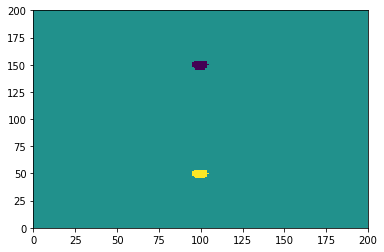

In [ ]:

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Discretización de la ecuación de Laplace 2D
# Construiremos una solución aproximada, 

###################   Parámetros #######################
# define el número de puntos sobre la malla
n = 200
# Vamos a pensar en una esfera de radio r, separada de una "punta" separa por una distancia sep*r
sep = .9
# número de iteraciones
npasos = n

########################################################

# definimos una "mascara"
mascara = np.zeros((n,n),dtype=int )
# y una matriz para guardar los valores del potencial
phi = np.zeros((n,n))



# Los dos círculos

for i in range(-int(n/4.*(1-sep)),int(n/4.*(1-sep))):
    y = np.sqrt(n**2/16. *(1.-sep)**2 - (i)**2)
    for j in range(int(n/2-y),int(n/2+y)):
        mascara[int(n/4+i), j] = 1
        phi[int(n/4+i), j] = 1.
        mascara[int(3.*n/4+i), j] = 1
        phi[int(3.*n/4+i), j] = -1.
# Mostramos el estado inicial    
plt.pcolor(phi)
plt.show()

for step in range(npasos):
    newphi =  np.zeros((n,n))
    # recorro toda la malla, salvo el borde.
    # Nótese que con esta elección, el borde del gráfico es un borde "implícito",
    # que queda a potencial 0.
    for i in range(1,n-1):
        for j in range(1,n-1):
            # si el punto está en la máscara, copio el valor anterior.
            if mascara[i,j] == 1: 
                newphi[i,j] = phi[i,j]
            # si no, lo calculo el promedio
            else:
                newphi[i,j] = .25*(phi[i,j-1]+phi[i,j+1]+phi[i+1,j]+phi[i-1,j])

    phi = newphi

plt.pcolor(newphi)
plt.show()


# Para obtener un gráfico más suave, podemos usar "contourf":
plt.contourf(newphi)
plt.colorbar()
plt.show()